> ### In this tutorial we will cover:
> - which file formats are supported
> - how to convert between them
> - what external integrations are available

## Supported formats

biobuild Molecules can be loaded from a number of different input types and exported to them as well.
Here is an overview of supported formats:

```mermaid
flowchart TB

  node_1("Molecule")
  node_2(["PDB"])
  node_3(["mmCIF"])
  node_9(["Molfile"])
  node_11(("SMILES"))
  node_4(["JSON\n(biobuild)"])
  node_5(["pickle\n(biobuild)"])
  node_6{{"rdkit\n(Chem.rdchem.Mol)"}}
  node_7{{"openbabel\n(pybel.Molecule)"}}
  node_8{{"biopython\n(PDB.Structure)"}}
  node_10{{"openmm\n(openmm.PDBFile)"}}
  node_2 <--> node_1
  node_3 <--> node_1
  node_9 <-.-> node_1
  node_11 <-.-> node_1
  node_4 <--> node_1
  node_5 <--> node_1
  node_6 <--> node_1
  node_7 <--> node_1
  node_8 <--> node_1
  node_10 <--> node_1
  
```

Here are is a table with the corresponding methods available in the `Molecule` class:

| Format    | As input      | As output      |
| --------- | ------------- | -------------- |
| PDB       | `from_pdb`    | `to_pdb`       |
| mmCIF     | `from_cif`    | `to_cif`       |
| Molfile   | `from_molfile` | `to_molfile`  |
| SMILES    | `from_smiles`  | `to_smiles`   |
| JSON      | `from_json`   | `to_json`      |
| pickle    | `load`        | `save`         |
| rdkit     | `from_rdkit`  | `to_rdkit`     |
| openbabel | `from_pybel`  | `to_pybel`     |
| openmm    | `from_openmm` | `to_openmm`    | 
| biopython | `<normal init>` | `to_biopython` |

In fact, using the toplevel `molecule` function will automatically try to discern which input type is given and perform the necessary file-reading, parsing, and/or format conversions. For some of the methods there are also functional equivalents available such as the `read_pdb` and `write_pdb` functions as equivalents to the `from_pbd` and `to_pdb` methods.

### Examples

Assuming we want to read a structure from a PDB file, relabel the atoms and save the structure to a CIF file, we could do:

In [1]:
import biobuild as bb

man = bb.Molecule.from_pdb("files/man.pdb")

# relabel the atoms to match the CHARMM force field nomenclature
man.autolabel()

# save as a CIF file
man.to_cif("files/man.cif")

### External integrations

Biobuild is built on top of `biopython` so naturally all biobuild molecules can function with `biopython` out of the box. In case any functionality is not working, the extra biobuild-overhead can be removed using the `to_biopython` method. However, biobuild is not limited to biopython. It also supports direct conversions with `RDKit` and `openbabel`.

So maybe we want to perform some more intricate chemical analyses using `rdkit` but first we want to make use of biobuild's easy methods for creating larger molecules. Maybe we want to generate a tri-peptide HIS-GLU-HIS which we can then analyse further.

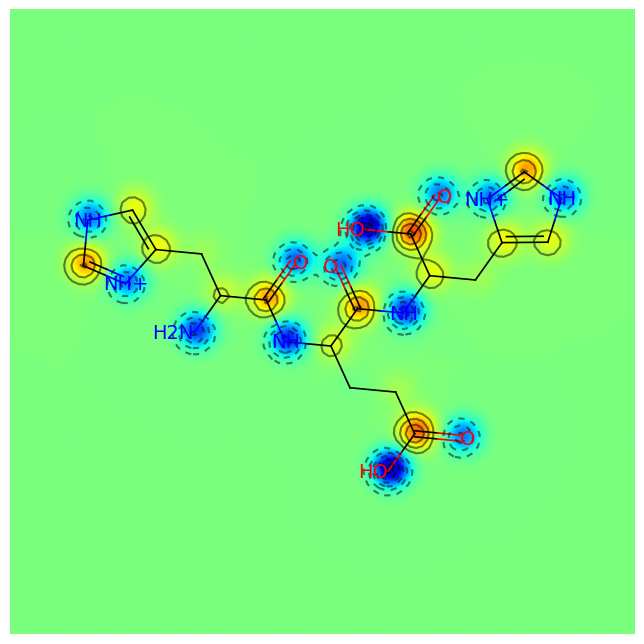

In [11]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem
from rdkit.Chem import AllChem

# first we need to load the amino acids data
bb.load_amino_acids()

# now we get the amino acids we want to connect
his = bb.Molecule.from_compound("HIS")
glu = bb.Molecule.from_compound("GLU")

# connect the amino acids using the peptide linkage (called "LINK")
peptide = bb.connect(his, glu, "LINK")
peptide = bb.connect(peptide, his, "LINK")


# convert to an RDKit molecule
peptide = peptide.to_rdkit()

# remove the 3D coordinates
peptide.RemoveAllConformers()

# now we can use RDKit to perform further analysis
AllChem.ComputeGasteigerCharges(peptide)
fig = SimilarityMaps.GetSimilarityMapFromWeights(peptide, [x.GetDoubleProp("_GasteigerCharge") for x in peptide.GetAtoms()], colorMap='jet', contourLines=10)
